In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

## Read the dataset

In [28]:
data = pd.read_csv('Country-data.csv')

In [29]:
data.head(3)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460


In [30]:
# lETS SET COUNTRY AS INDEX
data.set_index('country',inplace=True)

In [31]:
data.head(3)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460


In [32]:
print(f'No of rows: {data.shape[0]}')
print(f'No of columns: {data.shape[1]}')

No of rows: 167
No of columns: 9


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 13.0+ KB


## Descriptive statistics

In [34]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


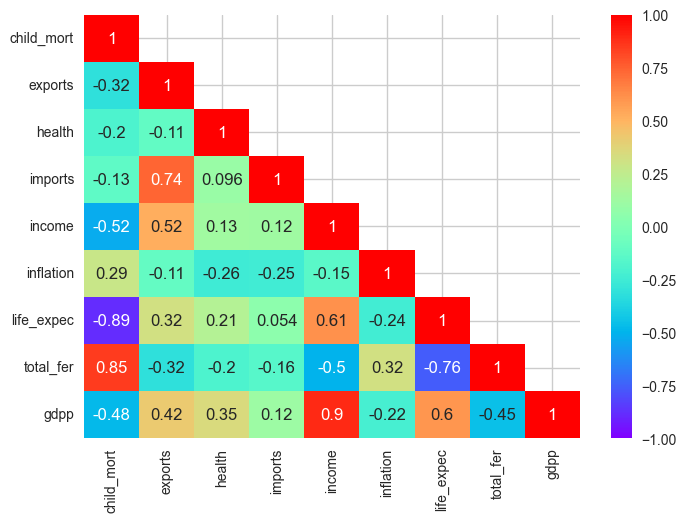

In [35]:
sns.heatmap(data.corr(),vmin=-1,annot=True,cmap='rainbow',mask=np.triu(data.corr(),k=1))
plt.show()

## Visualization

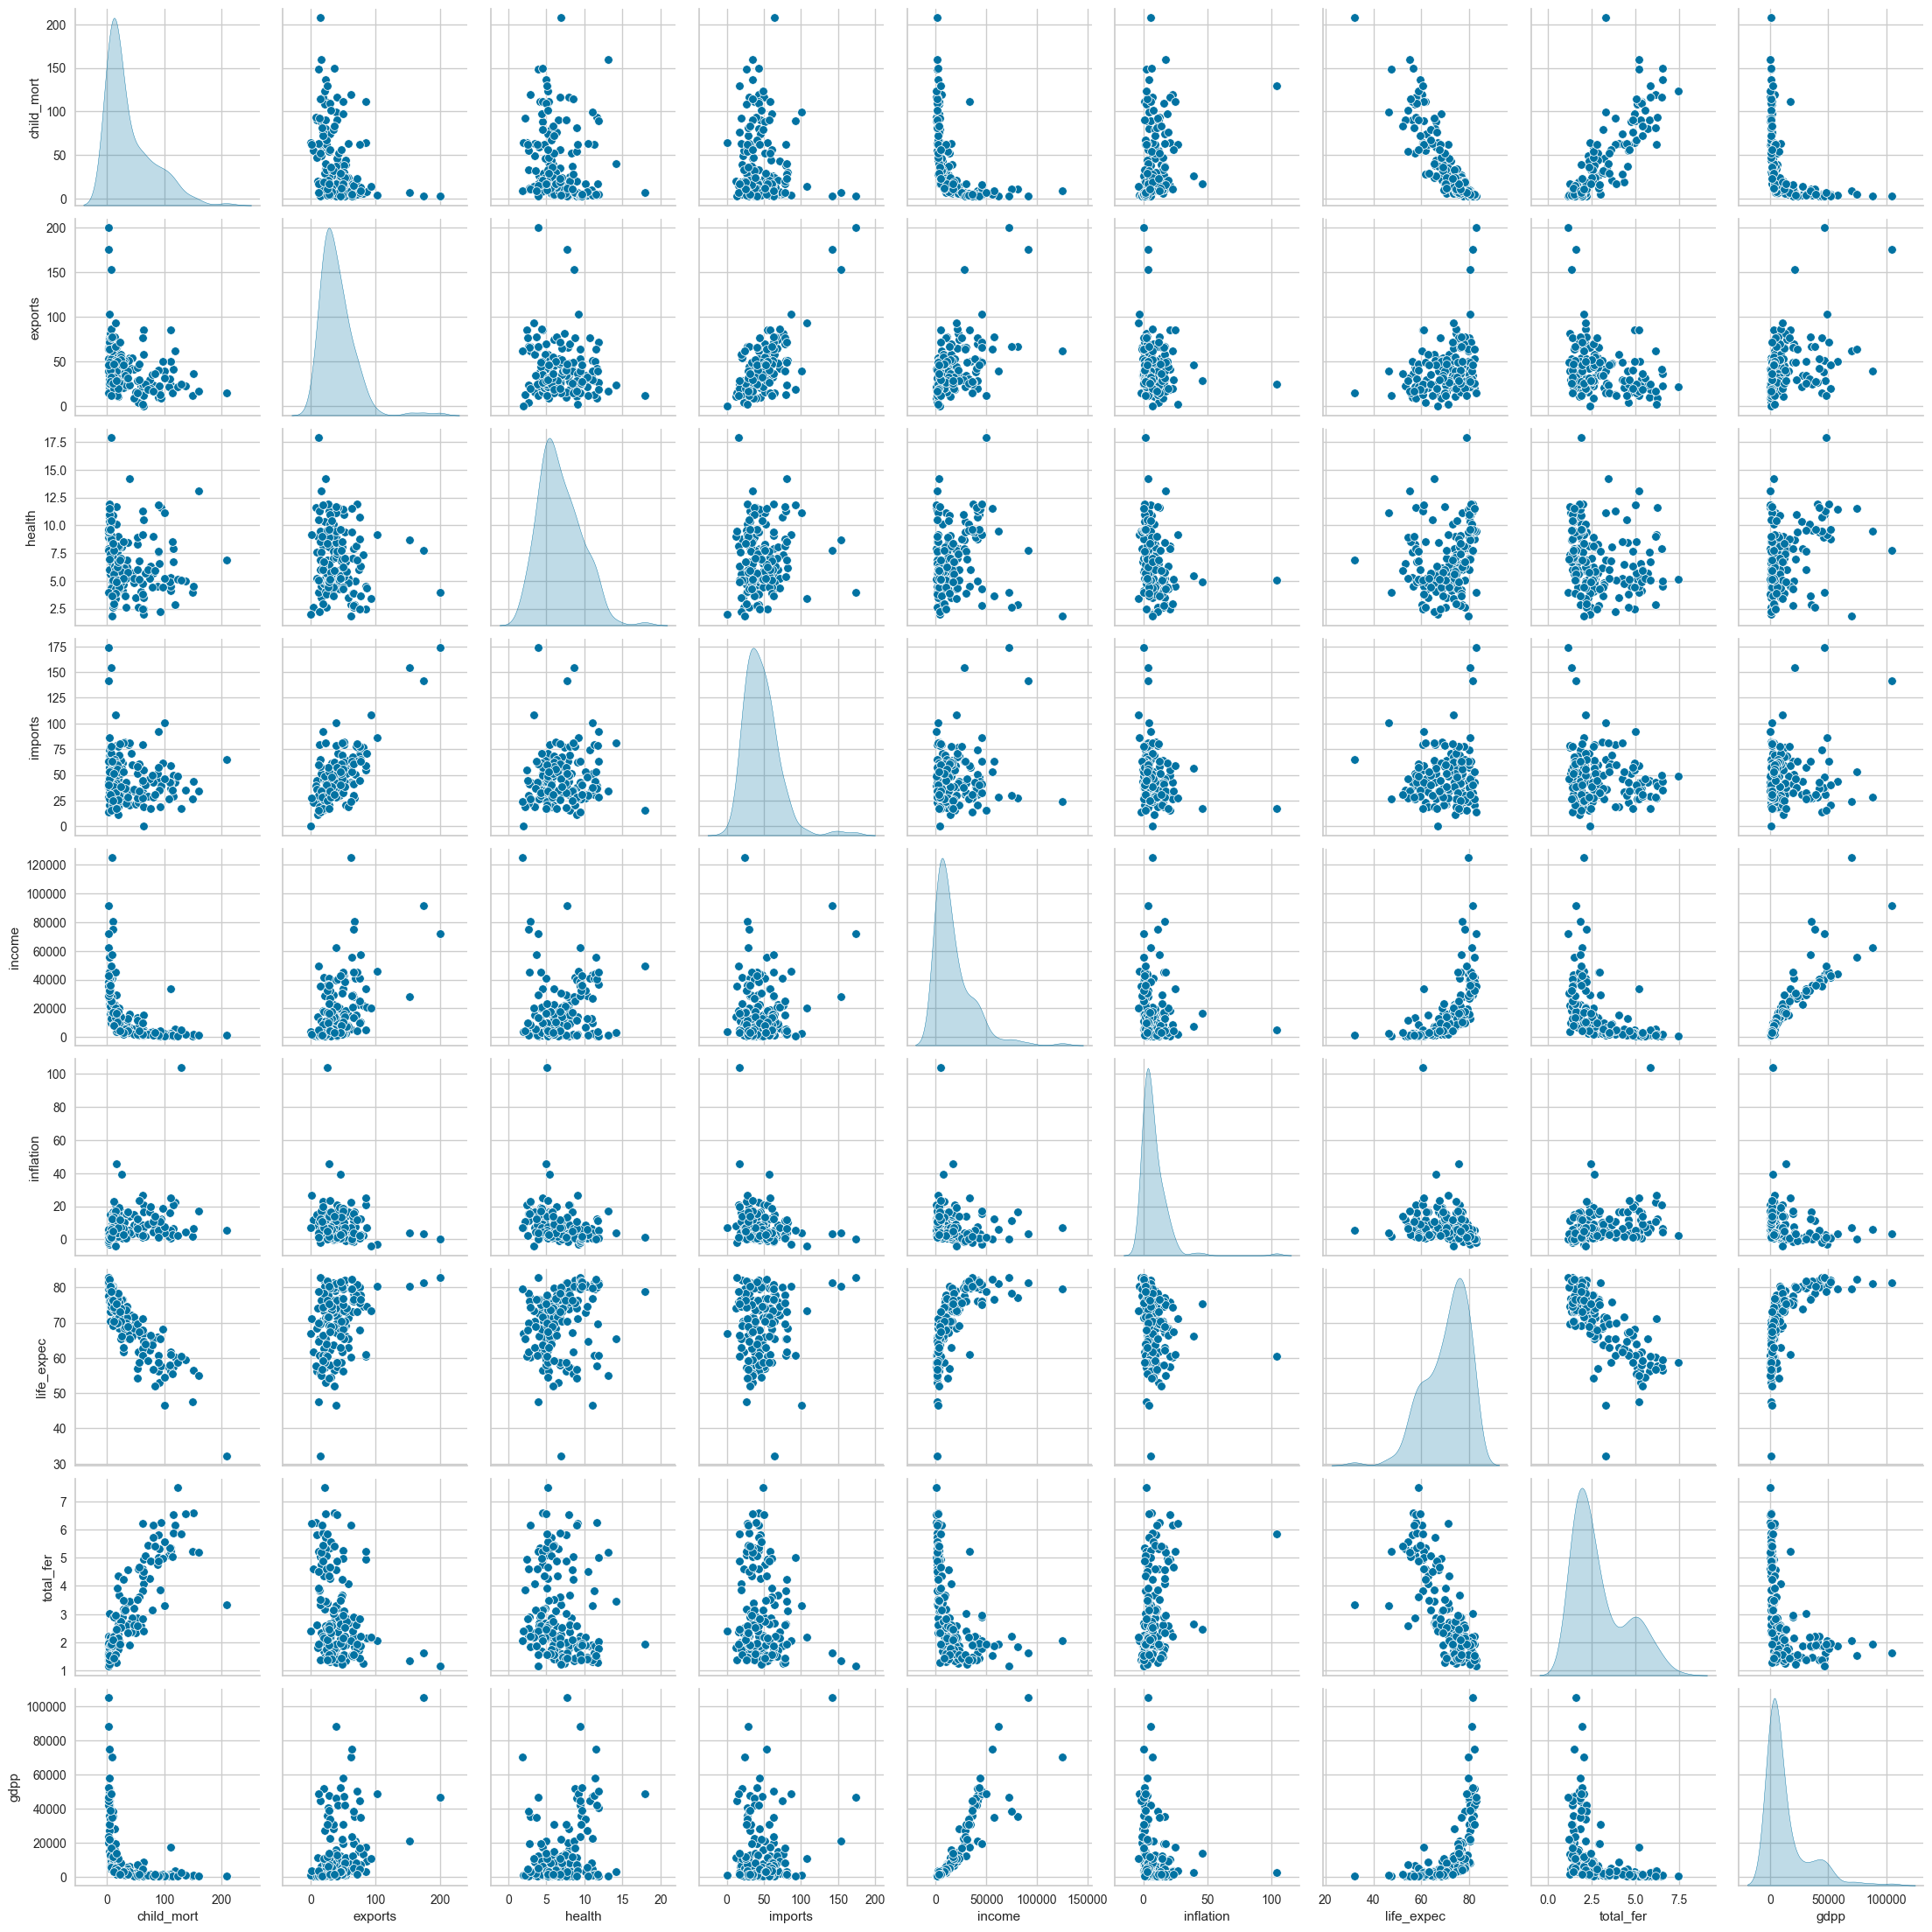

In [36]:
sns.pairplot(data=data,diag_kind='kde')
plt.show()

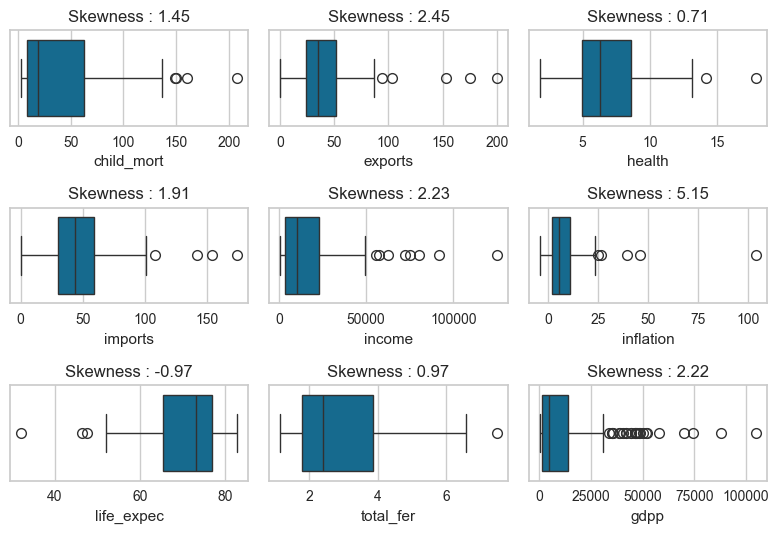

In [37]:
# Boxplot
t=1
for i in data.columns:
    plt.subplot(3,3,t)
    sns.boxplot(data=data,x=i)
    plt.title(f'Skewness : {round(data[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

## Data Preprocessing

In [38]:
# Check for missing
data.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [39]:
# Check for duplicates
data.duplicated().sum()

np.int64(0)

In [40]:
# treat the outliers
# lest cap the extreme outliers (2*IRQ)

for i in data.columns:
    q1,q3 = np.quantile(data[i],[0.25,0.75])
    iqr = q3-q1
    ul,ll = q3+2*iqr,q1-2*iqr
    data[i] = data[i].apply(lambda x:ul if x>ul else ll if x<ll else x)

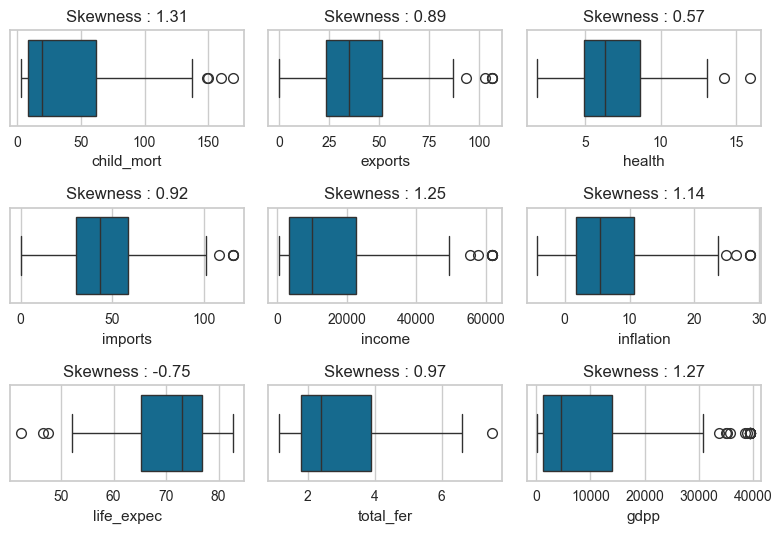

In [41]:
t=1
for i in data.columns:
    plt.subplot(3,3,t)
    sns.boxplot(data=data,x=i)
    plt.title(f'Skewness : {round(data[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

In [42]:
# Scale the data
sc = StandardScaler()
data_s = pd.DataFrame(sc.fit_transform(data),columns=data.columns)

In [43]:
data_s.head(3)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.325807,-1.350898,0.287879,-0.059395,-0.908259,0.327015,-1.669872,1.902882,-0.800533
1,-0.545011,-0.536547,-0.094264,0.115438,-0.394747,-0.384140,0.658280,-0.859973,-0.534220
2,-0.273031,-0.066034,-0.977272,-0.697302,-0.211439,1.283842,0.681446,-0.038404,-0.506362


## Reduce the datset using PCA

In [44]:
pca = PCA(n_components=9)

In [45]:
pca.fit(data_s)

,"n_components n_components: int, float or 'mle', default=NoneNumber of components to keep.if n_components is not set all components are kept:: n_components == min(n_samples, n_features)If ``n_components == 'mle'`` and ``svd_solver == 'full'``, Minka'sMLE is used to guess the dimension. Use of ``n_components == 'mle'``will interpret ``svd_solver == 'auto'`` as ``svd_solver == 'full'``.If ``0 < n_components < 1`` and ``svd_solver == 'full'``, select thenumber of components such that the amount of variance that needs to beexplained is greater than the percentage specified by n_components.If ``svd_solver == 'arpack'``, the number of components must bestrictly less than the minimum of n_features and n_samples.Hence, the None case results in:: n_components == min(n_samples, n_features) - 1",9
,"copy copy: bool, default=TrueIf False, data passed to fit are overwritten and runningfit(X).transform(X) will not yield the expected results,use fit_transform(X) instead.",True
,"whiten whiten: bool, default=FalseWhen True (False by default) the `components_` vectors are multipliedby the square root of n_samples and then divided by the singular valuesto ensure uncorrelated outputs with unit component-wise variances.Whitening will remove some information from the transformed signal(the relative variance scales of the components) but can sometimeimprove the predictive accuracy of the downstream estimators bymaking their data respect some hard-wired assumptions.",False
,"svd_solver svd_solver: {'auto', 'full', 'covariance_eigh', 'arpack', 'randomized'}, default='auto'""auto"" : The solver is selected by a default 'auto' policy is based on `X.shape` and `n_components`: if the input data has fewer than 1000 features and more than 10 times as many samples, then the ""covariance_eigh"" solver is used. Otherwise, if the input data is larger than 500x500 and the number of components to extract is lower than 80% of the smallest dimension of the data, then the more efficient ""randomized"" method is selected. Otherwise the exact ""full"" SVD is computed and optionally truncated afterwards.""full"" : Run exact full SVD calling the standard LAPACK solver via `scipy.linalg.svd` and select the components by postprocessing""covariance_eigh"" : Precompute the covariance matrix (on centered data), run a classical eigenvalue decomposition on the covariance matrix typically using LAPACK and select the components by postprocessing. This solver is very efficient for n_samples >> n_features and small n_features. It is, however, not tractable otherwise for large n_features (large memory footprint required to materialize the covariance matrix). Also note that compared to the ""full"" solver, this solver effectively doubles the condition number and is therefore less numerical stable (e.g. on input data with a large range of singular values).""arpack"" : Run SVD truncated to `n_components` calling ARPACK solver via `scipy.sparse.linalg.svds`. It requires strictly `0 < n_components < min(X.shape)`""randomized"" : Run randomized SVD by the method of Halko et al... versionadded:: 0.18.0.. versionchanged:: 1.5 Added the 'covariance_eigh' solver.",'auto'
,"tol tol: float, default=0.0Tolerance for singular values computed by svd_solver == 'arpack'.Must be of range [0.0, infinity)... versionadded:: 0.18.0",0.0
,"iterated_power iterated_power: int or 'auto', default='auto'Number of iterations for the power method computed bysvd_solver == 'randomized'.Must be of range [0, infinity)... versionadded:: 0.18.0",'auto'
,"n_oversamples n_oversamples: int, default=10This parameter is only relevant when `svd_solver=""randomized""`.It corresponds to the additional number of random vectors to sample therange of `X` so as to ensure proper conditioning. See:func:`~sklearn.utils.extmath.randomized_svd` for more details... versionadded:: 1.1",10
,"power_iteration_normalizer power_iteration_normalizer: {'auto', 'QR', 'LU', 'none'}, default='auto'Power iteration normalizer for randomized SVD 

In [46]:
pca.explained_variance_ratio_

array([0.48163025, 0.16586924, 0.13639048, 0.09910154, 0.0655671 ,
       0.02171641, 0.0164242 , 0.0094028 , 0.00389797])

In [47]:
# Lets decide how many PC's we can use
pca.explained_variance_

array([4.36078478, 1.50181611, 1.23490898, 0.89728681, 0.59365874,
       0.1966251 , 0.14870828, 0.08513501, 0.03529306])

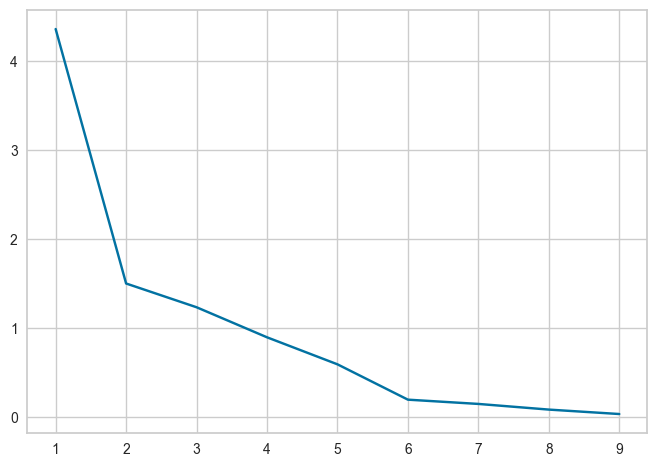

In [48]:
# Scree plot
plt.plot(range(1,10),pca.explained_variance_)
plt.show()

In [49]:
# Explianed variance ration
np.cumsum(pca.explained_variance_ratio_)

array([0.48163025, 0.6474995 , 0.78388998, 0.88299152, 0.94855862,
       0.97027503, 0.98669923, 0.99610203, 1.        ])

In [50]:
pca_final = PCA(n_components=5)
pca_data = pd.DataFrame(pca_final.fit_transform(data_s),
                        columns=['PC1','PC2','PC3','PC4','PC5'],index=data.index)

In [51]:
pca_data.head(3)

,PC1,PC2,PC3,PC4,PC5
country,,,,,
Afghanistan,-3.099217,-0.232689,0.972447,0.787536,-0.009905
Albania,0.427427,-0.285346,0.242571,-1.377388,0.114011
Algeria,-0.411658,-0.526613,-1.634043,-0.613283,0.459962


## KMeans Clustring on PCA data

In [53]:
# Decide the value of k

#kelbow = KElbowVisualizer(estimator=KMeans(random_state=0),k=10)

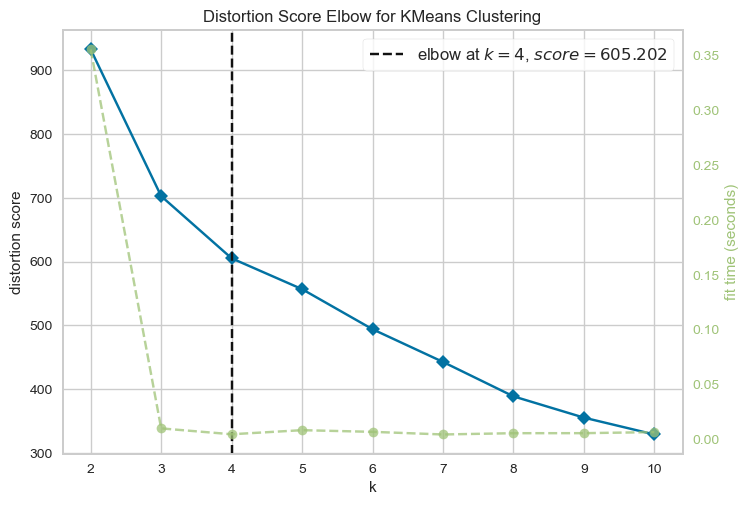

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
#kelbow.fit(pca_data)
#kelbow.show()

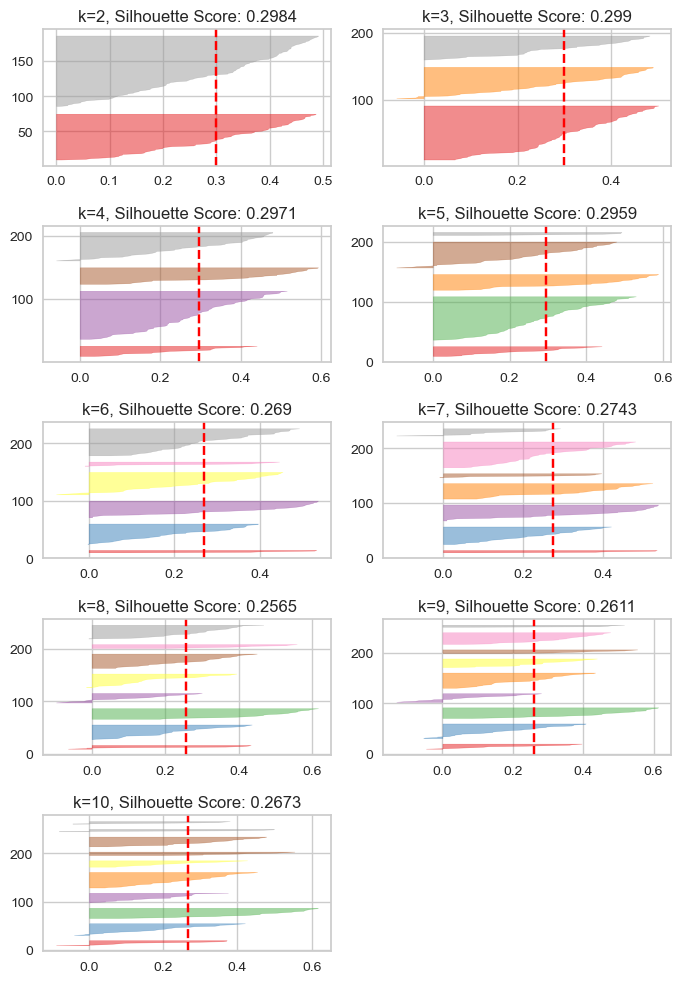

In [ ]:
#t=1
#plt.figure(figsize=(7,10))
#for i in range(2,11):
#    model = KMeans(n_clusters=i,random_state=0)
#    sil_viz = SilhouetteVisualizer(model)
#    sil_viz.fit(pca_data)
#    plt.title(f'k={i}, Silhouette Score: {round(sil_viz.silhouette_score_,4)}')
#    t+=1
#plt.tight_layout()
#plt.show()

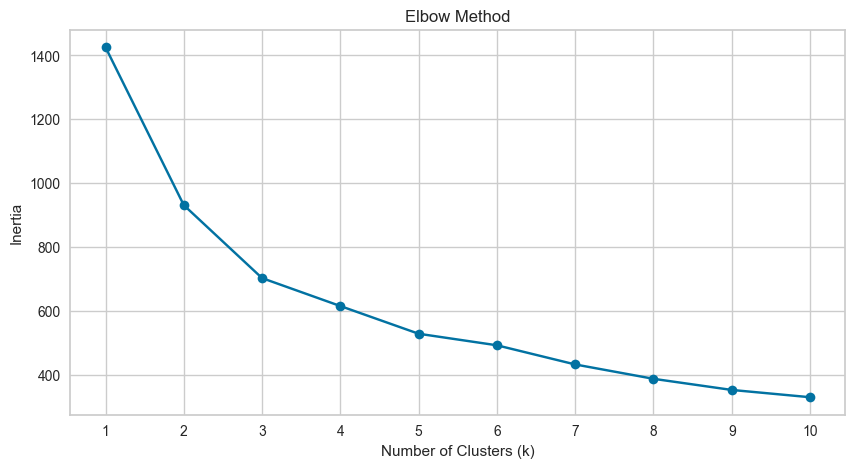

In [54]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(pca_data)
    inertia.append(km.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.xticks(range(1, 11))
plt.show()

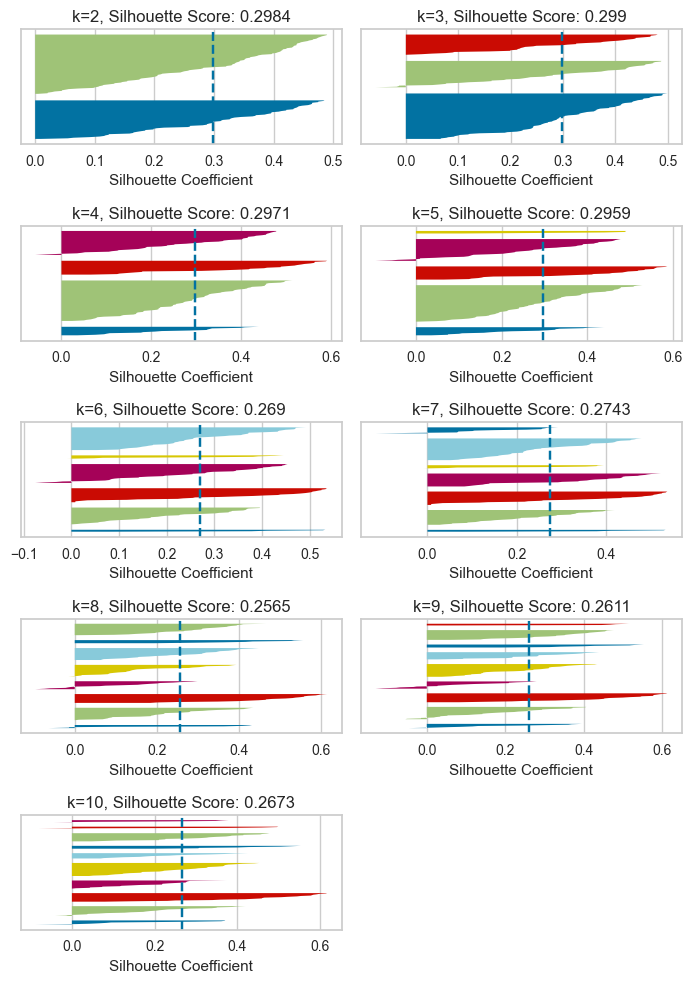

In [55]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import numpy as np

t = 1
plt.figure(figsize=(7,10))

for i in range(2, 11):
    plt.subplot(5, 2, t)
    
    model = KMeans(n_clusters=i, random_state=0)
    cluster_labels = model.fit_predict(pca_data)
    
    silhouette_avg = silhouette_score(pca_data, cluster_labels)
    sample_silhouette_values = silhouette_samples(pca_data, cluster_labels)
    
    y_lower = 10
    for cluster in range(i):
        cluster_silhouette_vals = sample_silhouette_values[cluster_labels == cluster]
        cluster_silhouette_vals.sort()
        
        size_cluster = cluster_silhouette_vals.shape[0]
        y_upper = y_lower + size_cluster
        
        plt.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            cluster_silhouette_vals
        )
        
        y_lower = y_upper + 10
    
    plt.axvline(x=silhouette_avg, linestyle="--")
    plt.title(f'k={i}, Silhouette Score: {round(silhouette_avg,4)}')
    plt.yticks([])
    plt.xlabel("Silhouette Coefficient")
    
    t += 1

plt.tight_layout()
plt.show()

In [56]:
# Lets go with k=3

kmeans_model = KMeans(n_clusters=3,random_state=0)

In [57]:
kmeans_model.fit(pca_data)

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",3
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",'auto'
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",0
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


In [58]:

pred = kmeans_model.predict(pca_data)
pca_data['labels'] = pred

In [59]:
pca_data.head(3)

,PC1,PC2,PC3,PC4,PC5,labels
country,,,,,,
Afghanistan,-3.099217,-0.232689,0.972447,0.787536,-0.009905,1
Albania,0.427427,-0.285346,0.242571,-1.377388,0.114011,0
Algeria,-0.411658,-0.526613,-1.634043,-0.613283,0.459962,0


In [60]:
data['labels'] = pred

In [61]:
data.head(3)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,1
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,0
Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,0


## Visualize the clusters

In [62]:
centroids  = kmeans_model.cluster_centers_
centroids

array([[ 0.18789482,  0.09749425, -0.18668634, -0.74790798,  0.18934052],
       [-2.5308199 ,  0.10840405,  0.20904521,  0.63748954, -0.14282851],
       [ 2.86681026, -0.35670063,  0.14254351,  0.83051233, -0.23432848]])

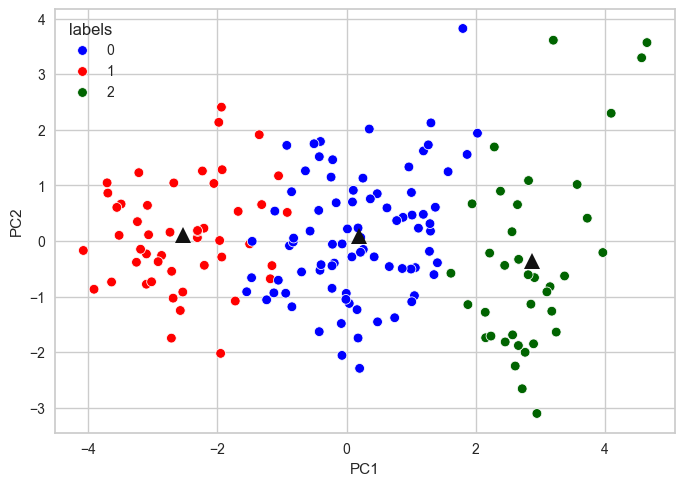

In [63]:
sns.scatterplot(data=pca_data,x='PC1',y='PC2',hue='labels',palette=['blue','red','darkgreen'])
for i in range(3):
    plt.plot(centroids[i][0],centroids[i][1],marker='^',ms=12,color='k')
plt.show()

## Business Interpretation

In [64]:
data.groupby(by='labels').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
labels,,,,,,,,,
0,21.508537,40.797317,6.231951,48.097561,12281.097561,7.365720,72.875610,2.311707,6291.146341
1,91.570833,28.546229,6.296458,41.443040,3937.770833,10.345729,59.558333,4.953958,1902.916667
2,5.237838,52.458108,8.730541,47.971622,41360.540541,2.588432,79.956757,1.755676,34073.243243


In [65]:
data['labels'] = data['labels'].map({0:'Developing',1:'Underdeveloped',2:'Developed'})

In [66]:
data.head(3)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,Underdeveloped
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,Developing
Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,Developing


In [67]:
# Developed Countries
data[data['labels']=='Developed'].index

Index(['Australia', 'Austria', 'Bahamas', 'Bahrain', 'Belgium', 'Brunei',
       'Canada', 'Cyprus', 'Czech Republic', 'Denmark', 'Finland', 'France',
       'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Kuwait', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway',
       'Portugal', 'Qatar', 'Singapore', 'Slovak Republic', 'Slovenia',
       'South Korea', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates',
       'United Kingdom', 'United States'],
      dtype='object', name='country')

In [68]:
# Developing Countries
data[data['labels']=='Developing'].index

Index(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Azerbaijan', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cambodia',
       'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Fiji', 'Georgia', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'India',
       'Indonesia', 'Iran', 'Jamaica', 'Jordan', 'Kazakhstan',
       'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Libya', 'Lithuania',
       'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius',
       'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco',
       'Nepal', 'Oman', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland',
       'Romania', 'Russia', 'Samoa', 'Saudi Arabia', 'Serbia', 'Seychelles',
       'Solomon Islands', 'Sri Lanka', 'St. Vincent and the Grenadines',
       'Suriname', 'Tajikistan', '

In [69]:
# Underdeveloped Countries
data[data['labels']=='Underdeveloped'].index

Index(['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Cote d'Ivoire', 'Equatorial Guinea',
       'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau',
       'Haiti', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Myanmar',
       'Namibia', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal',
       'Sierra Leone', 'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste',
       'Togo', 'Uganda', 'Yemen', 'Zambia'],
      dtype='object', name='country')

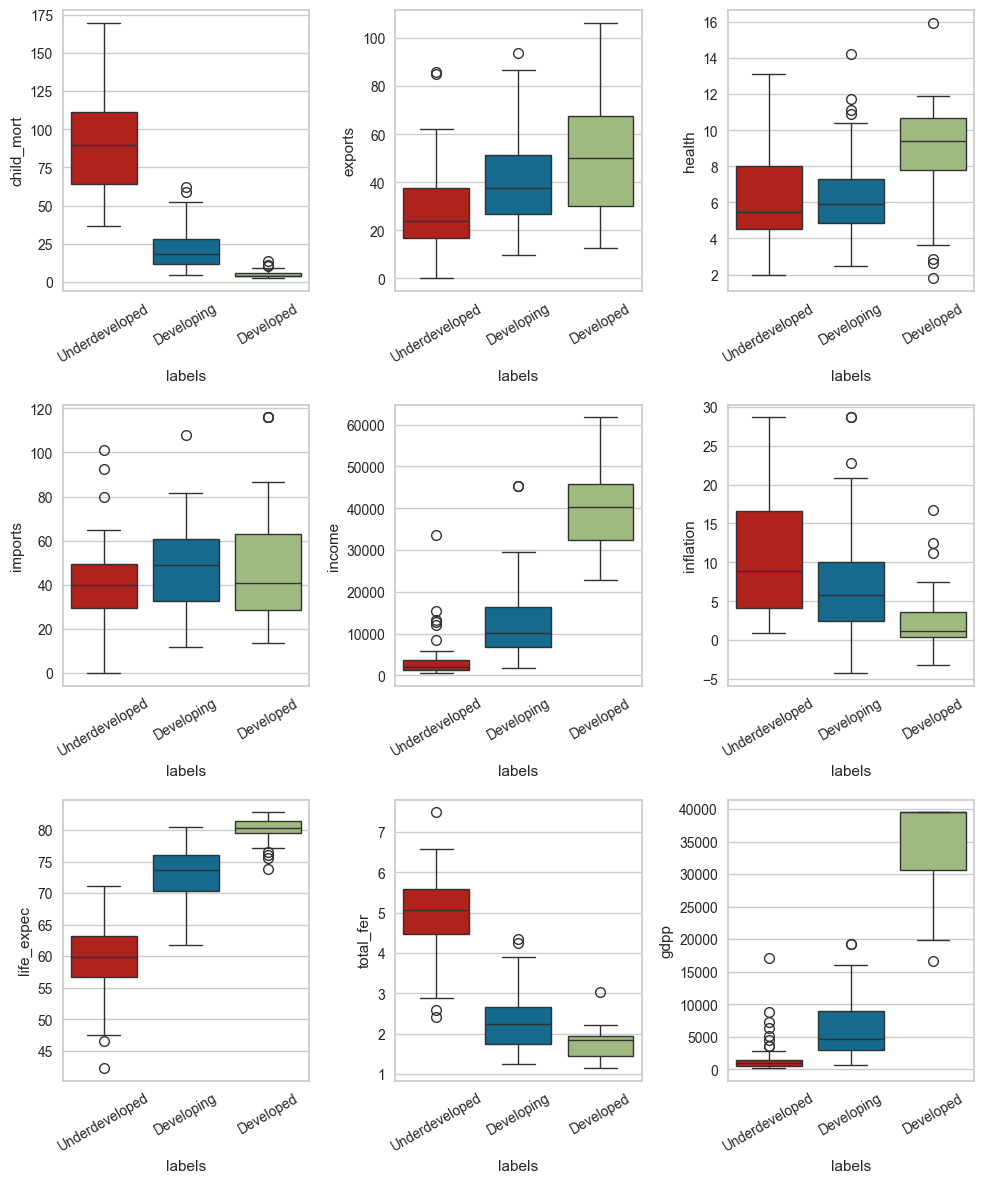

In [70]:
t = 1
plt.figure(figsize=(10,12))
for i in data.select_dtypes(np.number).columns:
    plt.subplot(3,3,t)
    sns.boxplot(data=data,y=i,x='labels',palette=['r','b','g'])
    plt.xticks(rotation=30)
    t+=1
plt.tight_layout()
plt.show()

In [71]:
px.choropleth(data_frame=data,locationmode='country names',
             locations=data.index,color='labels',
              color_discrete_map={'Underdeveloped':'red',
                                 'Developed':'green','Developing':'blue'})

## Deployment

In [72]:
import pickle

In [73]:
# create a pickle of fitted model

with open('final_model.pkl','wb') as file:
    pickle.dump(kmeans_model,file)

In [74]:
# create a pickle of standard scaler and pca

with open('scaler.pkl','wb') as file:
    pickle.dump(sc,file)

with open('pca.pkl','wb') as file:
    pickle.dump(pca_final,file)

In [75]:
pca_data.head(2)

,PC1,PC2,PC3,PC4,PC5,labels
country,,,,,,
Afghanistan,-3.099217,-0.232689,0.972447,0.787536,-0.009905,1
Albania,0.427427,-0.285346,0.242571,-1.377388,0.114011,0


In [76]:
kmeans_model.predict([[-3.099217,-0.232689,-0.972447,0.787536,-0.009905]])[0]

np.int32(1)